<a href="https://colab.research.google.com/github/alamandaputri/football-player-position-classification/blob/main/player_position_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare library

In [1]:
# for data preprocessing
import pandas as pd
import numpy as np
from numpy import savetxt
from numpy import loadtxt
from sklearn.preprocessing import LabelEncoder

# split data to train and test data
from sklearn.model_selection import train_test_split

# for modeling with Support Vector Machine
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# for visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import plotly.express as px

# save and load model
import pickle

## Import Data from Google Drive

In [2]:
file = "/content/drive/MyDrive/FARIZA ALAMANDA PUTRI/Data/player_position_data.csv"
df = pd.read_csv(file)

# shuffle the dataset!
df = df.sample(frac=1).reset_index(drop=True)

In [3]:
df.head()

,player_name,player_position,player_attack,player_defence,player_header_accuracy,player_dribble_accuracy,player_place_kicking,player_ball_control,player_top_speed,player_body_balance,player_jump,player_acceleration,player_low_pass,player_lofted_pass,player_tight_possession,player_kicking_power,player_GK_reflexes,player_stamina,player_ball_winning
0,R. OLSEN,GK,50,50,70,54,55,58,63,58,79,62,58,60,53,76,87,57,53
1,J. KING,CF,74,53,65,77,72,79,91,73,80,89,68,66,82,82,40,72,52
2,M. DEMBÉLÉ,CMF,67,70,63,87,57,85,72,70,73,70,80,73,88,80,40,77,71
3,M. ARNAUTOVIĆ,CF,81,55,74,82,73,83,83,71,72,80,76,76,79,83,40,78,58
4,T. STEPANENKO,DMF,68,82,75,66,60,77,71,71,77,67,83,79,74,78,40,85,83


## EDA

In [12]:
EDAData = df.groupby("player_position").mean(numeric_only=True)

In [13]:
EDAData

,player_attack,player_defence,player_header_accuracy,player_dribble_accuracy,player_place_kicking,player_ball_control,player_top_speed,player_body_balance,player_jump,player_acceleration,player_low_pass,player_lofted_pass,player_tight_possession,player_kicking_power,player_GK_reflexes,player_stamina,player_ball_winning
player_position,,,,,,,,,,,,,,,,,
AMF,77.218750,56.265625,64.468750,82.968750,77.000000,83.859375,77.531250,80.781250,67.218750,79.984375,81.531250,79.234375,83.343750,80.265625,40.000000,78.203125,57.156250
CB,61.460000,84.220000,83.200000,68.040000,60.840000,72.700000,74.933333,68.160000,83.186667,71.473333,75.480000,75.073333,69.193333,75.560000,40.000000,79.900000,84.433333
CF,83.115385,50.338462,78.961538,78.061538,69.784615,79.953846,79.700000,75.438462,77.515385,78.123077,73.723077,69.015385,77.400000,81.623077,40.000000,78.384615,52.176923
CMF,73.404255,70.063830,68.248227,79.191489,72.333333,82.241135,74.460993,77.085106,71.617021,75.432624,82.524823,80.546099,80.226950,80.042553,40.000000,82.879433,72.879433
DMF,66.406250,77.609375,72.359375,73.781250,67.359375,78.781250,73.031250,73.187500,74.921875,72.468750,80.968750,79.437500,76.859375,78.265625,40.000000,82.875000,79.906250
GK,42.422680,53.030928,65.927835,50.793814,55.783505,57.164948,62.876289,63.030928,81.134021,62.876289,60.587629,63.845361,51.144330,80.185567,89.907216,61.886598,49.989691
LB,71.755556,72.066667,67.777778,78.066667,68.044444,78.355556,82.088889,76.311111,73.644444,81.444444,76.000000,79.177778,76.066667,78.422222,40.000000,82.822222,75.000000
RB,69.769231,73.096154,68.230769,75.730769,63.769231,76.865385,82.980769,74.576923,74.538462,81.576923,75.634615,77.500000,74.423077,75.173077,40.000000,84.134615,76.057692
SMF,77.452381,57.095238,65.595238,83.214286,71.095238,81.595238,83.190476,80.452381,68.714286,83.880952,77.261905,77.428571,79.428571,79.047619,40.000000,80.833333,58.023810


In [14]:
EDAData = EDAData.transpose()
EDAData

player_position,AMF,CB,CF,CMF,DMF,GK,LB,RB,SMF,SS,W
player_attack,77.218750,61.460000,83.115385,73.404255,66.406250,42.422680,71.755556,69.769231,77.452381,82.8,78.838095
player_defence,56.265625,84.220000,50.338462,70.063830,77.609375,53.030928,72.066667,73.096154,57.095238,50.5,51.047619
player_header_accuracy,64.468750,83.200000,78.961538,68.248227,72.359375,65.927835,67.777778,68.230769,65.595238,70.2,65.142857
player_dribble_accuracy,82.968750,68.040000,78.061538,79.191489,73.781250,50.793814,78.066667,75.730769,83.214286,82.9,84.723810
player_place_kicking,77.000000,60.840000,69.784615,72.333333,67.359375,55.783505,68.044444,63.769231,71.095238,76.0,72.980952
player_ball_control,83.859375,72.700000,79.953846,82.241135,78.781250,57.164948,78.355556,76.865385,81.595238,83.6,83.161905
player_top_speed,77.531250,74.933333,79.700000,74.460993,73.031250,62.876289,82.088889,82.980769,83.190476,80.8,84.276190
player_body_balance,80.781250,68.160000,75.438462,77.085106,73.187500,63.030928,76.311111,74.576923,80.452381,79.6,81.533333
player_jump,67.218750,83.186667,77.515385,71.617021,74.921875,81.134021,73.644444,74.538462,68.714286,73.8,68.628571
player_acceleration,79.984375,71.473333,78.123077,75.432624,72.468750,62.876289,81.444444,81.576923,83.880952,82.2,86.047619


In [15]:
fig = px.line_polar(EDAData, r=EDAData['CB'], theta = ['Attack', 'Defence', 'Header', 'Dribble', 'Place Kicking',
                     'Ball Control', 'Speed', 'Balance', 'Jump', 'Acceleration',
                     'Low Pass', 'Lofted Pass', 'Tight Possession', 'Kicking Power',
                     'GK Reflexes', 'Stamina', 'Ball Winning'], line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=False
)
fig.update_layout(
    title={
        'text': "Radar Chart Rata-Rata Skor Kemampuan Posisi CB",
        'y':1.0,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

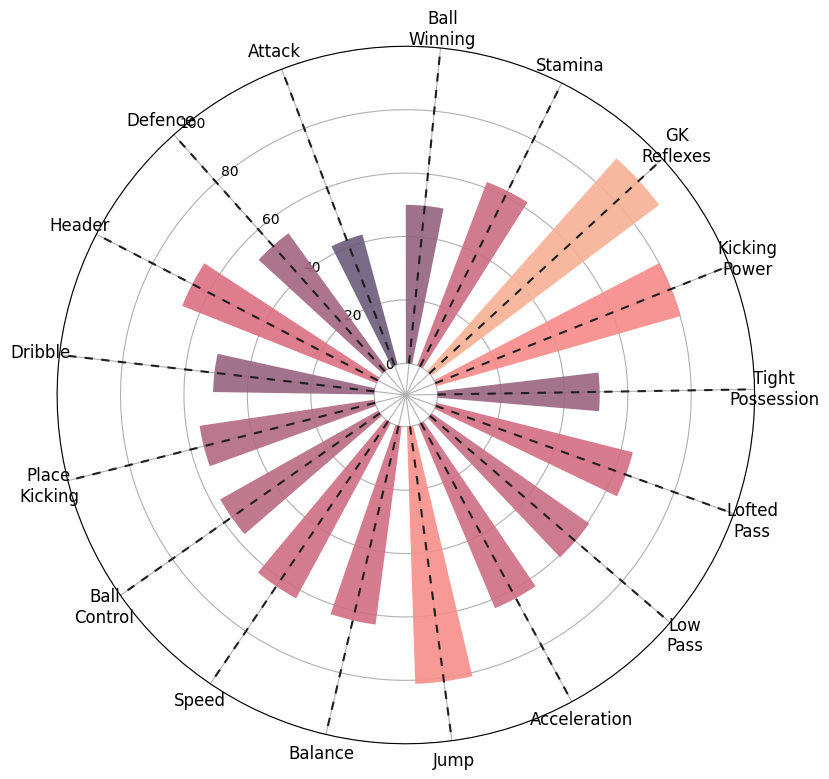

In [17]:
from textwrap import wrap
import matplotlib as mpl
# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(EDAData), endpoint=False)

# Cumulative length
LENGTHS = EDAData["GK"].values

# Region label
REGION = ['Attack', 'Defence', 'Header', 'Dribble', 'Place Kicking',
                     'Ball Control', 'Speed', 'Balance', 'Jump', 'Acceleration',
                     'Low Pass', 'Lofted Pass', 'Tight Possession', 'Kicking Power',
                     'GK Reflexes', 'Stamina', 'Ball Winning']

GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=LENGTHS.min(), vmax=LENGTHS.max())

# Normalized colors. Each number of tracks is mapped to a color in the
# color scale 'cmap'
COLORS = cmap(norm(LENGTHS))

# Some layout stuff ----------------------------------------------
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-10, 100)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.2, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 100, color=GREY12, ls=(0, (4, 4)), zorder=11)

# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word,
# but the 'break_long_words' means we don't want to break words
# longer than 5 characters.
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in REGION]

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=12);

## Define Features and Target Variable

ada 17 variabel input (features) dan 1 variabel output (target variables)

In [18]:
# define features and target variable
X = df.iloc[:,2:19].values
Y = df.iloc[:,1].values
print("Matrix of features", X, sep = '\n')
print("--------------------------------------------------")
print("Target Variable", Y, sep='\n')

Matrix of features
[[50 50 70 ... 87 57 53]
 [74 53 65 ... 40 72 52]
 [67 70 63 ... 40 77 71]
 ...
 [65 61 69 ... 40 81 71]
 [66 75 76 ... 40 84 79]
 [88 49 85 ... 40 80 48]]
--------------------------------------------------
Target Variable
['GK' 'CF' 'CMF' 'CF' 'DMF' 'CF' 'CF' 'W' 'CMF' 'CMF' 'CB' 'RB' 'GK' 'AMF'
 'CF' 'CB' 'GK' 'CB' 'CF' 'SMF' 'AMF' 'W' 'CB' 'CMF' 'CB' 'GK' 'CB' 'CB'
 'LB' 'GK' 'RB' 'AMF' 'DMF' 'CMF' 'CMF' 'CB' 'CF' 'DMF' 'W' 'DMF' 'CF'
 'GK' 'GK' 'W' 'RB' 'CMF' 'LB' 'CMF' 'GK' 'W' 'CB' 'CF' 'GK' 'CF' 'LB'
 'CF' 'W' 'DMF' 'W' 'W' 'W' 'CB' 'SMF' 'CF' 'W' 'W' 'SMF' 'CF' 'GK' 'W'
 'CB' 'CB' 'CB' 'W' 'CF' 'CMF' 'AMF' 'CB' 'W' 'W' 'CB' 'AMF' 'CMF' 'CF'
 'CMF' 'SS' 'DMF' 'DMF' 'CB' 'CB' 'CB' 'CB' 'DMF' 'GK' 'CF' 'CB' 'CB'
 'AMF' 'AMF' 'CMF' 'W' 'CB' 'RB' 'W' 'AMF' 'SMF' 'GK' 'CB' 'CF' 'CMF'
 'AMF' 'RB' 'CB' 'CB' 'W' 'CMF' 'CMF' 'CMF' 'CMF' 'CB' 'CB' 'DMF' 'LB'
 'DMF' 'GK' 'CMF' 'LB' 'CB' 'W' 'CMF' 'W' 'CF' 'AMF' 'CMF' 'CF' 'CB' 'CF'
 'AMF' 'W' 'GK' 'CB' 'GK' 'AMF' 'CMF' '

## Label encode target variable

In [19]:
# label encode the target variable
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(Y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                      label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
print("Label Encoded Target Variable", encoded_y, sep="\n")

Mapping of Label Encoded Classes
{'AMF': np.int64(0), 'CB': np.int64(1), 'CF': np.int64(2), 'CMF': np.int64(3), 'DMF': np.int64(4), 'GK': np.int64(5), 'LB': np.int64(6), 'RB': np.int64(7), 'SMF': np.int64(8), 'SS': np.int64(9), 'W': np.int64(10)}
Label Encoded Target Variable
[ 5  2  3  2  4  2  2 10  3  3  1  7  5  0  2  1  5  1  2  8  0 10  1  3
  1  5  1  1  6  5  7  0  4  3  3  1  2  4 10  4  2  5  5 10  7  3  6  3
  5 10  1  2  5  2  6  2 10  4 10 10 10  1  8  2 10 10  8  2  5 10  1  1
  1 10  2  3  0  1 10 10  1  0  3  2  3  9  4  4  1  1  1  1  4  5  2  1
  1  0  0  3 10  1  7 10  0  8  5  1  2  3  0  7  1  1 10  3  3  3  3  1
  1  4  6  4  5  3  6  1 10  3 10  2  0  3  2  1  2  0 10  5  1  5  0  3
  1  2  1  6  1  2  8  3 10  5 10  5  6 10  2  1 10 10  1  6 10  0  8  4
  1  4  4  2  5  1  5  6  1  3  7  1  9  2  4  6  3  3  5  2  1  3  0  4
  7 10 10  1  4  1  7  8  1  1  3  6  6  0  2  3  5  5  0  1  2  1  7  5
  3  2  3 10  1  3  2  7  3  3 10  0  0  4  0  1  5  3  8  2  9  2

## Checking class distribution

periksa apakah ada masalah data imbalance

Class=5, n=97 (10.778%)
Class=2, n=130 (14.444%)
Class=3, n=141 (15.667%)
Class=4, n=64 (7.111%)
Class=10, n=105 (11.667%)
Class=1, n=150 (16.667%)
Class=7, n=52 (5.778%)
Class=0, n=64 (7.111%)
Class=8, n=42 (4.667%)
Class=6, n=45 (5.000%)
Class=9, n=10 (1.111%)


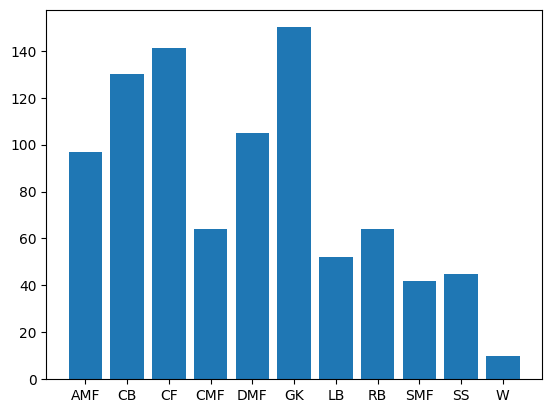

In [20]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
# summarize distribution
counter = Counter(encoded_y)
for k,v in counter.items():
 per = v / len(encoded_y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
bars = ('AMF', 'CB', 'CF', 'CMF', 'DMF', 'GK', 'LB', 'RB', 'SMF', 'SS', 'W')
x_pos = np.arange(len(bars))
pyplot.bar(x_pos, counter.values())
plt.xticks(x_pos, bars)
pyplot.show()

## SMOTE upsampling

Class=5, n=150 (9.091%)
Class=2, n=150 (9.091%)
Class=3, n=150 (9.091%)
Class=4, n=150 (9.091%)
Class=10, n=150 (9.091%)
Class=1, n=150 (9.091%)
Class=7, n=150 (9.091%)
Class=0, n=150 (9.091%)
Class=8, n=150 (9.091%)
Class=6, n=150 (9.091%)
Class=9, n=150 (9.091%)


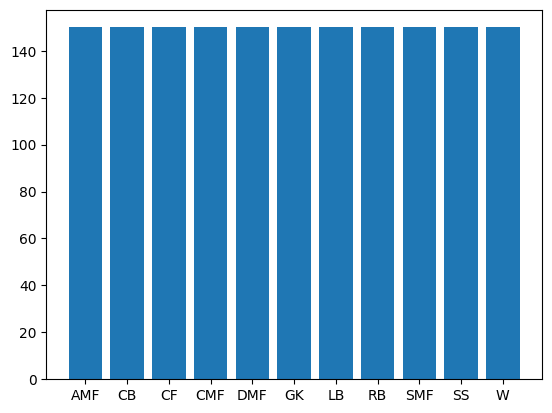

In [21]:
# transform the dataset
oversample = SMOTE()
X_up, y_up = oversample.fit_resample(X, encoded_y)
# summarize distribution
counter = Counter(y_up)
for k,v in counter.items():
 per = v / len(y_up) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
bars = ('AMF', 'CB', 'CF', 'CMF', 'DMF', 'GK', 'LB', 'RB', 'SMF', 'SS', 'W')
x_pos = np.arange(len(bars))
pyplot.bar(counter.keys(), counter.values())
plt.xticks(x_pos, bars)
pyplot.show()

## Split data into training and testing data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X_up, y_up,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    stratify=y_up)

In [23]:
print("Dimension of Train set",x_train.shape)
print("Dimension of Test set",x_test.shape,"\n")

Dimension of Train set (1320, 17)
Dimension of Test set (330, 17) 



## Standard Scaling for features

In [24]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Support Vector Machine modelling

In [25]:
# Libraries to Build Ensemble Model : Random Forest Classifier
# Create the parameter grid based on the results of random search
params_grid = [{'kernel': ['rbf'], 'gamma': [0.125, 0.25, 0.5, 1, 2, 4, 8],
                'C': [0.1, 1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
               {'kernel': ['poly'], 'gamma': [0.125, 0.25, 0.5, 1, 2, 4, 8],
                'C': [1, 10, 100, 1000], 'degree':[2, 3, 4, 5, 6, 7, 8]},
               {'kernel': ['sigmoid'], 'gamma': [0.125, 0.25, 0.5, 1, 2, 4, 8],
                'C': [0.1, 1, 10, 100, 1000]}]

In [26]:
# Performing CV to tune parameters for best SVM fit
svm_model = GridSearchCV(SVC(decision_function_shape='ovr'), params_grid, cv=10)
svm_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.125, 0.25, 0.5, 1, 2, 4, 8],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'degree': [2, 3, 4, 5, 6, 7, 8],
                          'gamma': [0.125, 0.25, 0.5, 1, 2, 4, 8],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.125, 0.25, 0.5, 1, 2, 4, 8],
                          'kernel': ['sigmoid']}])

In [27]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n")

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n")
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(x_test_scaled)
y_pred_label = list(label_encoder.inverse_transform(y_pred))

Best score for training data: 0.8871212121212123 

Best C: 10 

Best Kernel: rbf 

Best Gamma: 0.5 



## Confusion Matrix

In [28]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
y_test_label = label_encoder.inverse_transform(y_test)
print(confusion_matrix(y_test_label,y_pred_label))
print("\n")
print(classification_report(y_test_label,y_pred_label))

print("Training set score for SVM: %f" % final_model.score(x_train_scaled, y_train))
print("Testing  set score for SVM: %f" % final_model.score(x_test_scaled  , y_test ))

svm_model.score

[[26  0  1  3  0  0  0  0  0  0  0]
 [ 0 28  0  1  1  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  1  3]
 [ 0  0  0 26  3  0  0  1  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  3  0 27  0  0  0  0  0]
 [ 0  0  0  1  0  0 29  0  0  0  0]
 [ 0  0  0  0  0  0  1 29  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0]
 [ 0  0  1  0  0  0  0  0  0 29  0]
 [ 4  0  0  0  0  0  0  0  2  0 24]]


              precision    recall  f1-score   support

         AMF       0.87      0.87      0.87        30
          CB       1.00      0.93      0.97        30
          CF       0.93      0.87      0.90        30
         CMF       0.76      0.87      0.81        30
         DMF       0.88      1.00      0.94        30
          GK       1.00      0.90      0.95        30
          LB       0.97      0.97      0.97        30
          RB       0.97      0.97      0.97        30
         SMF       0.94      1.00      0.97        30
          SS       0.97      0.97      0.97        30
      

<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.125, 0.25, 0.5, 1, 2, 4, 8],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'degree': [2, 3, 4, 5, 6, 7, 8],
                          'gamma': [0.125, 0.25, 0.5, 1, 2, 4, 8],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.125, 0.25, 0.5, 1, 2, 4, 8],
                          'kernel': ['sigmoid']}])>

In [29]:
score = final_model.score(x_test_scaled, y_test)
print('Test score: {0:.2f}%'.format(100*score))

Test score: 92.12%


## Save Model with pickle

In [33]:
pkl_file = '/content/drive/MyDrive/FARIZA ALAMANDA PUTRI/Data/ModelSVM_1.pkl'
#with open(pkl_file, 'wb') as file:
#  pickle.dump(final_model, file)

## load model pickle

In [34]:
with open(pkl_file, 'rb') as file:
  pickle_model = pickle.load(file)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning:

Trying to unpickle estimator SVC from version 1.0.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



## save training dan testing data

terkadang model yang disimpan memberikan akurasi yang berbeda dibanding saat sebelum disimpan karena pembagian data yang berbeda lagi. Sehingga, untuk mendapatkan akurasi yang sama, gunakan pembagian data yang sama.

simpan model meggunakan numpy.savetxt

```
from numpy impoer savetxt
savetxt('path/nama file.txt', array, delimiter = ',', fmt='%s')
```


load model dengan numpy.loadtxt

```
from numpy import loadtxt
loadtxt('path/nama file.txt', delimiter = ',', dtype = 'str')
```

data target (label) disimpan dan dipanggil dengan cara yang berbeda, yaitu menambahkan argumen fmt='%s' di akhir pada function savetxt serta menambahkan argumen dtype='str'



## Predict New Data

In [35]:
new_data = pd.read_csv("/content/drive/MyDrive/FARIZA ALAMANDA PUTRI/Data/blue_lock_players.csv")

In [36]:
X_new = new_data.loc[:, new_data.columns!='player_name']
X_new

,player_attack,player_defence,player_header_accuracy,player_dribble_accuracy,player_place_kicking,player_ball_control,player_top_speed,player_body_balance,player_jump,player_acceleration,player_low_pass,player_lofted_pass,player_tight_possession,player_kicking_power,player_GK_reflexes,player_stamina,player_ball_winning
0,71,46,60,80,79,76,75,87,55,84,66,75,85,75,40,70,49
1,40,43,60,47,50,57,60,70,78,66,60,68,49,74,81,58,50
2,67,69,61,73,59,72,81,68,63,79,75,73,70,71,40,77,75
3,55,81,78,59,52,67,78,67,73,76,68,67,65,75,40,74,79
4,69,50,60,84,65,81,78,81,60,84,72,75,84,80,40,73,50
5,55,76,79,63,54,66,70,65,79,67,67,69,63,73,40,77,79
6,75,51,64,77,75,73,77,76,67,79,71,73,71,78,40,78,54
7,69,73,70,65,62,70,76,72,78,75,68,73,67,70,40,79,74
8,76,50,75,72,62,73,75,70,74,76,68,67,71,80,40,75,52
9,71,55,61,76,70,75,80,83,61,81,75,75,80,70,40,75,55


In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

In [38]:
predicted = pickle_model.predict(X_scaled)

In [39]:
predicted

array([10,  5,  3,  1, 10,  1,  0,  7,  2,  8,  3])

In [40]:
predicted = label_encoder.inverse_transform(predicted)

In [41]:
predicted

array(['W', 'GK', 'CMF', 'CB', 'W', 'CB', 'AMF', 'RB', 'CF', 'SMF', 'CMF'],
      dtype=object)

In [42]:
new_data['player_position'] = predicted

In [43]:
new_data

,player_name,player_attack,player_defence,player_header_accuracy,player_dribble_accuracy,player_place_kicking,player_ball_control,player_top_speed,player_body_balance,player_jump,player_acceleration,player_low_pass,player_lofted_pass,player_tight_possession,player_kicking_power,player_GK_reflexes,player_stamina,player_ball_winning,player_position
0,Eita Otoya,71,46,60,80,79,76,75,87,55,84,66,75,85,75,40,70,49,W
1,Gin Gagamaru,40,43,60,47,50,57,60,70,78,66,60,68,49,74,81,58,50,GK
2,Hyoma Chigiri,67,69,61,73,59,72,81,68,63,79,75,73,70,71,40,77,75,CMF
3,Ikki Niko,55,81,78,59,52,67,78,67,73,76,68,67,65,75,40,74,79,CB
4,Isagi Yoichi,69,50,60,84,65,81,78,81,60,84,72,75,84,80,40,73,50,W
5,Jyubei Aryu,55,76,79,63,54,66,70,65,79,67,67,69,63,73,40,77,79,CB
6,Kenyu Yukimiya,75,51,64,77,75,73,77,76,67,79,71,73,71,78,40,78,54,AMF
7,Meguru Bachira,69,73,70,65,62,70,76,72,78,75,68,73,67,70,40,79,74,RB
8,Rin Itoshi,76,50,75,72,62,73,75,70,74,76,68,67,71,80,40,75,52,CF
9,Seishiro Nagi,71,55,61,76,70,75,80,83,61,81,75,75,80,70,40,75,55,SMF
